# Homework 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pd.set_option("display.max_columns", 50)

%matplotlib inline

## Importing Data & Data Cleaning

In [2]:
# Importing Data Set
df = pd.read_csv("cses4_cut.csv")

# Renaming columns in accordance with the codebook
df = df.rename({"D2002": "GENDER", "D2003": "EDUCATION", "D2004": "MARITAL STATUS",
                "D2005": "UNION MEMBERSHIP OF RESPONDENT", "D2006": "UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD",
                "D2007": "BUSINESS OR EMPLOYERS' ASSOCIATION MEMBERSHIP", "D2008": "FARMERS' ASSOCIATION MEMBERSHIP",
                "D2009": "PROFESSIONAL ASSOCIATION MEMBERSHIP", "D2010": "CURRENT EMPLOYMENT STATUS",
                "D2011": "MAIN OCCUPATION", "D2012": "SOCIO ECONOMIC STATUS", "D2013": "EMPLOYMENT TYPE - PUBLIC OR PRIVATE",
                "D2014": "INDUSTRIAL SECTOR", "D2015": "SPOUSE: CURRENT EMPLOYMENT STATUS", "D2016": "SPOUSE: OCCUPATION",
                "D2017": "SPOUSE: SOCIO ECONOMIC STATUS", "D2018": "SPOUSE: EMPLOYMENT TYPE - PUBLIC OR PRIVATE",
                "D2019": "SPOUSE: INDUSTRIAL SECTOR", "D2020": "HOUSEHOLD INCOME", "D2021": "NUMBER IN HOUSEHOLD IN TOTAL",
                "D2022": "NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18", "D2023": "NUMBER IN HOUSEHOLD UNDER AGE 6",
                "D2024": "RELIGIOUS SERVICES ATTENDANCE", "D2025": "RELIGIOSITY", "D2026": "RELIGIOUS DENOMINATION",
                "D2027": "LANGUAGE USUALLY SPOKEN AT HOME", "D2028": "REGION OF RESIDENCE", "D2029": "RACE",
                "D2030": "ETHNICITY", "D2031": "RURAL OR URBAN RESIDENCE", "age": "AGE", "voted": "VOTED"}, axis=1)

# Dropping index column
df.drop("Unnamed: 0", axis=1, inplace=True)

# Replacing values indicating missing variables with NULL
df["GENDER"] = df["GENDER"].replace({9: np.nan})
df["EDUCATION"] = df["EDUCATION"].replace({97: np.nan, 98: np.nan, 99: np.nan})
df["MARITAL STATUS"] = df["MARITAL STATUS"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["UNION MEMBERSHIP OF RESPONDENT"] = df["UNION MEMBERSHIP OF RESPONDENT"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD"] = df["UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["BUSINESS OR EMPLOYERS' ASSOCIATION MEMBERSHIP"] = df["BUSINESS OR EMPLOYERS' ASSOCIATION MEMBERSHIP"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["FARMERS' ASSOCIATION MEMBERSHIP"] = df["FARMERS' ASSOCIATION MEMBERSHIP"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["PROFESSIONAL ASSOCIATION MEMBERSHIP"] = df["PROFESSIONAL ASSOCIATION MEMBERSHIP"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["CURRENT EMPLOYMENT STATUS"] = df["CURRENT EMPLOYMENT STATUS"].replace({97: np.nan, 98: np.nan, 99: np.nan})
df["MAIN OCCUPATION"] = df["MAIN OCCUPATION"].replace({996: np.nan, 997: np.nan, 998: np.nan, 999: np.nan})
df["SOCIO ECONOMIC STATUS"] = df["SOCIO ECONOMIC STATUS"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["EMPLOYMENT TYPE - PUBLIC OR PRIVATE"] = df["EMPLOYMENT TYPE - PUBLIC OR PRIVATE"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["INDUSTRIAL SECTOR"] = df["INDUSTRIAL SECTOR"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["SPOUSE: CURRENT EMPLOYMENT STATUS"] = df["SPOUSE: CURRENT EMPLOYMENT STATUS"].replace({97: np.nan, 98: np.nan, 99: np.nan})
df["SPOUSE: OCCUPATION"] = df["SPOUSE: OCCUPATION"].replace({997: np.nan, 998: np.nan, 999: np.nan})
df["SPOUSE: SOCIO ECONOMIC STATUS"] = df["SPOUSE: SOCIO ECONOMIC STATUS"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["SPOUSE: EMPLOYMENT TYPE - PUBLIC OR PRIVATE"] = df["SPOUSE: EMPLOYMENT TYPE - PUBLIC OR PRIVATE"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["SPOUSE: INDUSTRIAL SECTOR"] = df["SPOUSE: INDUSTRIAL SECTOR"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["HOUSEHOLD INCOME"] = df["HOUSEHOLD INCOME"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["NUMBER IN HOUSEHOLD IN TOTAL"] = df["NUMBER IN HOUSEHOLD IN TOTAL"].replace({97: np.nan, 98: np.nan, 99: np.nan})
df["NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18"] = df["NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18"].replace({97: np.nan, 98: np.nan, 99: np.nan})
df["NUMBER IN HOUSEHOLD UNDER AGE 6"] = df["NUMBER IN HOUSEHOLD UNDER AGE 6"].replace({97: np.nan, 98: np.nan, 99: np.nan})
df["RELIGIOUS SERVICES ATTENDANCE"] = df["RELIGIOUS SERVICES ATTENDANCE"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["RELIGIOSITY"] = df["RELIGIOSITY"].replace({7: np.nan, 8: np.nan, 9: np.nan})
df["RELIGIOUS DENOMINATION"] = df["RELIGIOUS DENOMINATION"].replace({97: np.nan, 98: np.nan, 99: np.nan})
df["LANGUAGE USUALLY SPOKEN AT HOME"] = df["LANGUAGE USUALLY SPOKEN AT HOME"].replace({997: np.nan, 998: np.nan, 999: np.nan})
df["REGION OF RESIDENCE"] = df["REGION OF RESIDENCE"].replace({99: np.nan})
df["RACE"] = df["RACE"].replace({997: np.nan, 998: np.nan, 999: np.nan})
df["ETHNICITY"] = df["ETHNICITY"].replace({997: np.nan, 998: np.nan, 999: np.nan})
df["RURAL OR URBAN RESIDENCE"] = df["RURAL OR URBAN RESIDENCE"].replace({7: np.nan, 8: np.nan, 9: np.nan})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   GENDER                                         12451 non-null  int64  
 1   EDUCATION                                      12411 non-null  float64
 2   MARITAL STATUS                                 11677 non-null  float64
 3   UNION MEMBERSHIP OF RESPONDENT                 11261 non-null  float64
 4   UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD        10116 non-null  float64
 5   BUSINESS OR EMPLOYERS' ASSOCIATION MEMBERSHIP  5304 non-null   float64
 6   FARMERS' ASSOCIATION MEMBERSHIP                5305 non-null   float64
 7   PROFESSIONAL ASSOCIATION MEMBERSHIP            5304 non-null   float64
 8   CURRENT EMPLOYMENT STATUS                      12387 non-null  float64
 9   MAIN OCCUPATION                                470

In [4]:
print("NULL Values Count & Percentage: (before filling)")
print(" "*50 + "Count" + " "*10 + "Percentage")
for col in df.isna().sum().sort_values(ascending=False).index:
    print(f"{col}" + " "*(50-len(col)) + f"{df[col].isna().sum()}" + " "*(15-len(str(df[col].isna().sum()))) + f"{df[col].isna().sum()/df.shape[0]*100:.2f}%")

NULL Values Count & Percentage: (before filling)
                                                  Count          Percentage
SPOUSE: SOCIO ECONOMIC STATUS                     10552          84.75%
SPOUSE: OCCUPATION                                10515          84.45%
ETHNICITY                                         10075          80.92%
SPOUSE: EMPLOYMENT TYPE - PUBLIC OR PRIVATE       9274           74.48%
SPOUSE: INDUSTRIAL SECTOR                         9244           74.24%
MAIN OCCUPATION                                   7751           62.25%
SPOUSE: CURRENT EMPLOYMENT STATUS                 7200           57.83%
BUSINESS OR EMPLOYERS' ASSOCIATION MEMBERSHIP     7147           57.40%
PROFESSIONAL ASSOCIATION MEMBERSHIP               7147           57.40%
FARMERS' ASSOCIATION MEMBERSHIP                   7146           57.39%
SOCIO ECONOMIC STATUS                             6663           53.51%
RACE                                              5565           44.70%
INDUSTRIAL 

- I will drop the columns with larger than 54% of NULL values (since I want to keep "**SOCIO ECONOMIC STATUS**", which can be an important indicator of voting behavior).
- I will also drop "**RELIGIOUS DENOMINATION**" column, since its values does not correspond to the ones shown in questionnaire.
- Then, I will try to fill the rest of the NULL values.
    - For the columns with less than 10% of NULL values, I will fill it with the most common value.
    - For the other columns, I will fill the NULL values with a value randomly chosen from that column, therefore, the values with more counts will have a higher chance to be selected.

In [5]:
print("The following columns have been dropped:")

# Dropping columns with larger than 53% of NULL values
for col in df.columns:
    if df[col].isna().sum()/df.shape[0]*100 > 54:
        print(f"- {col}")
        df.drop(col, axis=1, inplace=True)
        
# Dropping "RELIGIOUS DENOMINATION"
df.drop("RELIGIOUS DENOMINATION", axis=1, inplace=True)
print("- RELIGIOUS DENOMINATION")

The following columns have been dropped:
- BUSINESS OR EMPLOYERS' ASSOCIATION MEMBERSHIP
- FARMERS' ASSOCIATION MEMBERSHIP
- PROFESSIONAL ASSOCIATION MEMBERSHIP
- MAIN OCCUPATION
- SPOUSE: CURRENT EMPLOYMENT STATUS
- SPOUSE: OCCUPATION
- SPOUSE: SOCIO ECONOMIC STATUS
- SPOUSE: EMPLOYMENT TYPE - PUBLIC OR PRIVATE
- SPOUSE: INDUSTRIAL SECTOR
- ETHNICITY
- RELIGIOUS DENOMINATION


In [6]:
# Filling columns with less than 10% of NULL values with the most common value
print("Filling missing values in:")
for col in df.columns:
    if df[col].isna().sum()/df.shape[0]*100 < 10:
        df[col].fillna(df[col].value_counts().sort_values(ascending=False).index[0], inplace=True)
        print(f"- {col}")

Filling missing values in:
- GENDER
- EDUCATION
- MARITAL STATUS
- UNION MEMBERSHIP OF RESPONDENT
- CURRENT EMPLOYMENT STATUS
- RELIGIOUS SERVICES ATTENDANCE
- REGION OF RESIDENCE
- AGE
- VOTED


In [7]:
def fill_na(column):
    """
    This function fills the columns with a value randomly chosen from that column.
    Before filling, it keeps the counts of each value so that values with higher counts have a higher chance to be selected.
    """
    x = pd.DataFrame(df[column].dropna().value_counts().sort_index()).reset_index()
    
    values_list = []
    
    for i in range(len(x)):
        values_list.extend([list(x["index"])[i]] * list(x[column])[i])
    
    na_indices = df[df[col].isna()][[col]].index
    for index in na_indices:
        df.loc[index, col] = np.random.choice(values_list)

In [8]:
print("Filling missing values in:")
for col in df.columns:
    if df[col].isna().sum() > 0:
        fill_na(col)
        print(f"- {col}" + " "*(50-len(col))+  "- completed.")

Filling missing values in:
- UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD           - completed.
- SOCIO ECONOMIC STATUS                             - completed.
- EMPLOYMENT TYPE - PUBLIC OR PRIVATE               - completed.
- INDUSTRIAL SECTOR                                 - completed.
- HOUSEHOLD INCOME                                  - completed.
- NUMBER IN HOUSEHOLD IN TOTAL                      - completed.
- NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18      - completed.
- NUMBER IN HOUSEHOLD UNDER AGE 6                   - completed.
- RELIGIOSITY                                       - completed.
- LANGUAGE USUALLY SPOKEN AT HOME                   - completed.
- RACE                                              - completed.
- RURAL OR URBAN RESIDENCE                          - completed.


In [9]:
print("NULL Values Count & Percentage (after filling):")
print(" "*50 + "Count" + " "*10 + "Percentage")
for col in df.isna().sum().sort_values(ascending=False).index:
    print(f"{col}" + " "*(50-len(col)) + f"{df[col].isna().sum()}" + " "*(15-len(str(df[col].isna().sum()))) + f"{df[col].isna().sum()/df.shape[0]*100:.2f}%")

NULL Values Count & Percentage (after filling):
                                                  Count          Percentage
GENDER                                            0              0.00%
NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18      0              0.00%
AGE                                               0              0.00%
RURAL OR URBAN RESIDENCE                          0              0.00%
RACE                                              0              0.00%
REGION OF RESIDENCE                               0              0.00%
LANGUAGE USUALLY SPOKEN AT HOME                   0              0.00%
RELIGIOSITY                                       0              0.00%
RELIGIOUS SERVICES ATTENDANCE                     0              0.00%
NUMBER IN HOUSEHOLD UNDER AGE 6                   0              0.00%
NUMBER IN HOUSEHOLD IN TOTAL                      0              0.00%
EDUCATION                                         0              0.00%
HOUSEHOLD INCOME        

In [10]:
# Converting all columns into integer, except "VOTED"
for col in df.columns:
    if df[col].dtype == "float64":
        df[col] = df[col].astype(np.int64)

In [11]:
print("# of Unique Values in:")
for col in df.columns:
    print(f"- {col}: {df[col].nunique()}")

# of Unique Values in:
- GENDER: 2
- EDUCATION: 10
- MARITAL STATUS: 4
- UNION MEMBERSHIP OF RESPONDENT: 2
- UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD: 2
- CURRENT EMPLOYMENT STATUS: 11
- SOCIO ECONOMIC STATUS: 4
- EMPLOYMENT TYPE - PUBLIC OR PRIVATE: 6
- INDUSTRIAL SECTOR: 4
- HOUSEHOLD INCOME: 5
- NUMBER IN HOUSEHOLD IN TOTAL: 19
- NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18: 15
- NUMBER IN HOUSEHOLD UNDER AGE 6: 8
- RELIGIOUS SERVICES ATTENDANCE: 6
- RELIGIOSITY: 4
- LANGUAGE USUALLY SPOKEN AT HOME: 28
- REGION OF RESIDENCE: 49
- RACE: 6
- RURAL OR URBAN RESIDENCE: 4
- AGE: 81
- VOTED: 2


In [12]:
print("Unique Values in:")
for col in df.columns:
        print(f"- {col}: {sorted(df[col].unique())}")

Unique Values in:
- GENDER: [1, 2]
- EDUCATION: [1, 2, 3, 4, 5, 6, 7, 8, 9, 96]
- MARITAL STATUS: [1, 2, 3, 4]
- UNION MEMBERSHIP OF RESPONDENT: [1, 2]
- UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD: [1, 2]
- CURRENT EMPLOYMENT STATUS: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
- SOCIO ECONOMIC STATUS: [1, 2, 3, 4]
- EMPLOYMENT TYPE - PUBLIC OR PRIVATE: [1, 2, 3, 4, 5, 6]
- INDUSTRIAL SECTOR: [1, 2, 3, 4]
- HOUSEHOLD INCOME: [1, 2, 3, 4, 5]
- NUMBER IN HOUSEHOLD IN TOTAL: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
- NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16, 17, 18]
- NUMBER IN HOUSEHOLD UNDER AGE 6: [0, 1, 2, 3, 4, 5, 6, 10]
- RELIGIOUS SERVICES ATTENDANCE: [1, 2, 3, 4, 5, 6]
- RELIGIOSITY: [1, 2, 3, 4]
- LANGUAGE USUALLY SPOKEN AT HOME: [12, 32, 36, 44, 49, 103, 106, 121, 134, 221, 222, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996]
- REGION OF RESIDENCE: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

## Exploratory Data Analysis

### Categorical Columns:
- GENDER
- MARITAL STATUS
- UNION MEMBERSHIP OF RESPONDENT
- UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD
- CURRENT EMPLOYMENT STATUS
- EMPLOYMENT TYPE - PUBLIC OR PRIVATE
- INDUSTRIAL SECTOR
- LANGUAGE USUALLY SPOKEN AT HOME
- REGION OF RESIDENCE
- RACE

### Ordinal Columns:
- EDUCATION
- SOCIO ECONOMIC STATUS
- HOUSEHOLD INCOME
- RELIGIOUS SERVICES ATTENDANCE
- RELIGIOSITY
- RURAL OR URBAN RESIDENCE
- NUMBER IN HOUSEHOLD IN TOTAL
- NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18
- NUMBER IN HOUSEHOLD UNDER AGE 6

### Numerical Columns:
- AGE

In [13]:
df_categorical = df[["GENDER", "MARITAL STATUS", "UNION MEMBERSHIP OF RESPONDENT", "UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD",
                     "CURRENT EMPLOYMENT STATUS", "EMPLOYMENT TYPE - PUBLIC OR PRIVATE", "INDUSTRIAL SECTOR",
                     "LANGUAGE USUALLY SPOKEN AT HOME", "REGION OF RESIDENCE", "RACE"]]

df_ordinal = df[["EDUCATION", "SOCIO ECONOMIC STATUS", "HOUSEHOLD INCOME", "RELIGIOUS SERVICES ATTENDANCE",
                 "RELIGIOSITY", "RURAL OR URBAN RESIDENCE", "NUMBER IN HOUSEHOLD IN TOTAL",
                 "NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18", "NUMBER IN HOUSEHOLD UNDER AGE 6"]]

df_numerical = df[["AGE"]]

### Categorical Variables

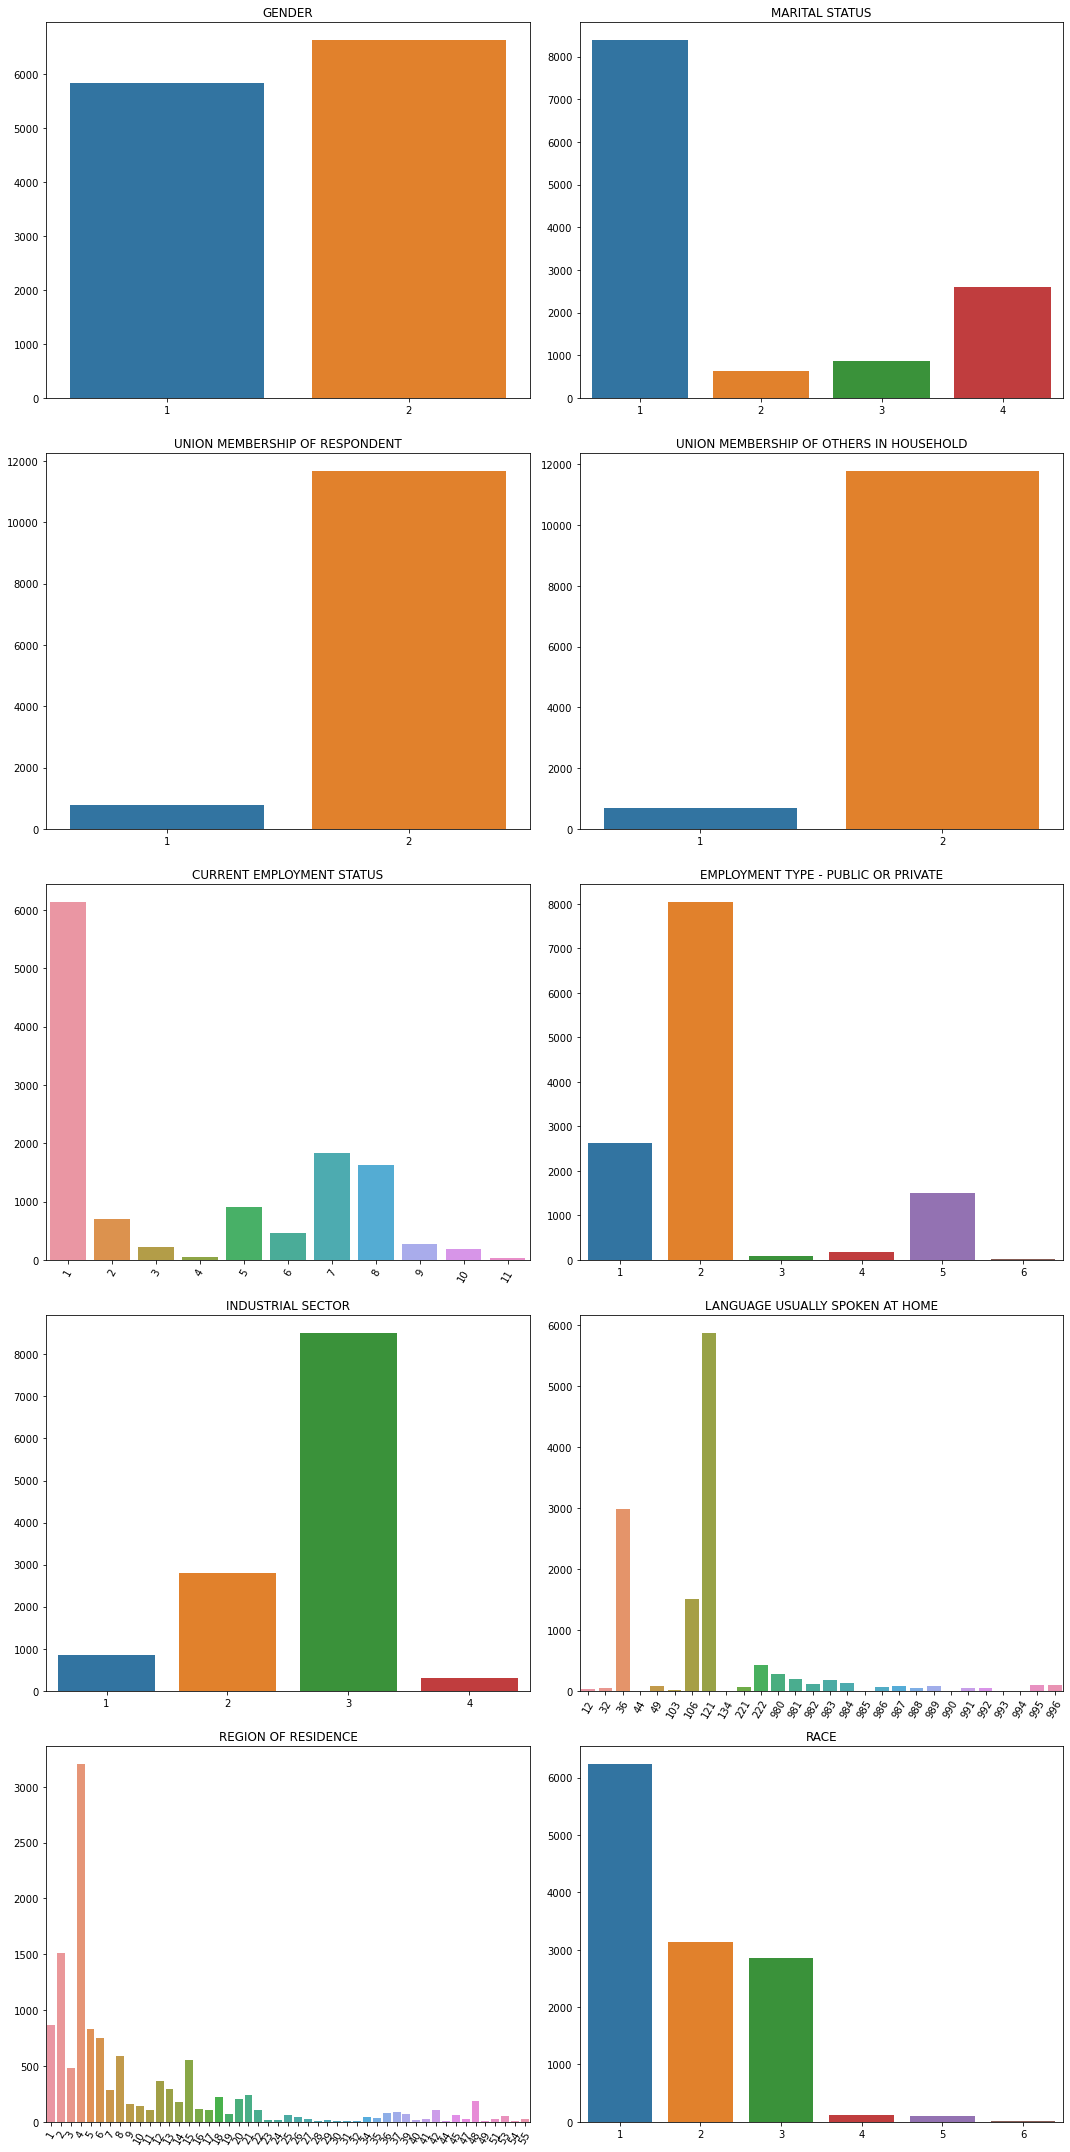

In [14]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(df_categorical.columns):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df_categorical[col], order = sorted(df_categorical[col].unique()))
    plt.title(col)
    if df_categorical[col].nunique() > 10:
        plt.xticks(rotation=60)
    plt.ylabel("")
    plt.xlabel("")
        
plt.tight_layout()
    
plt.show()

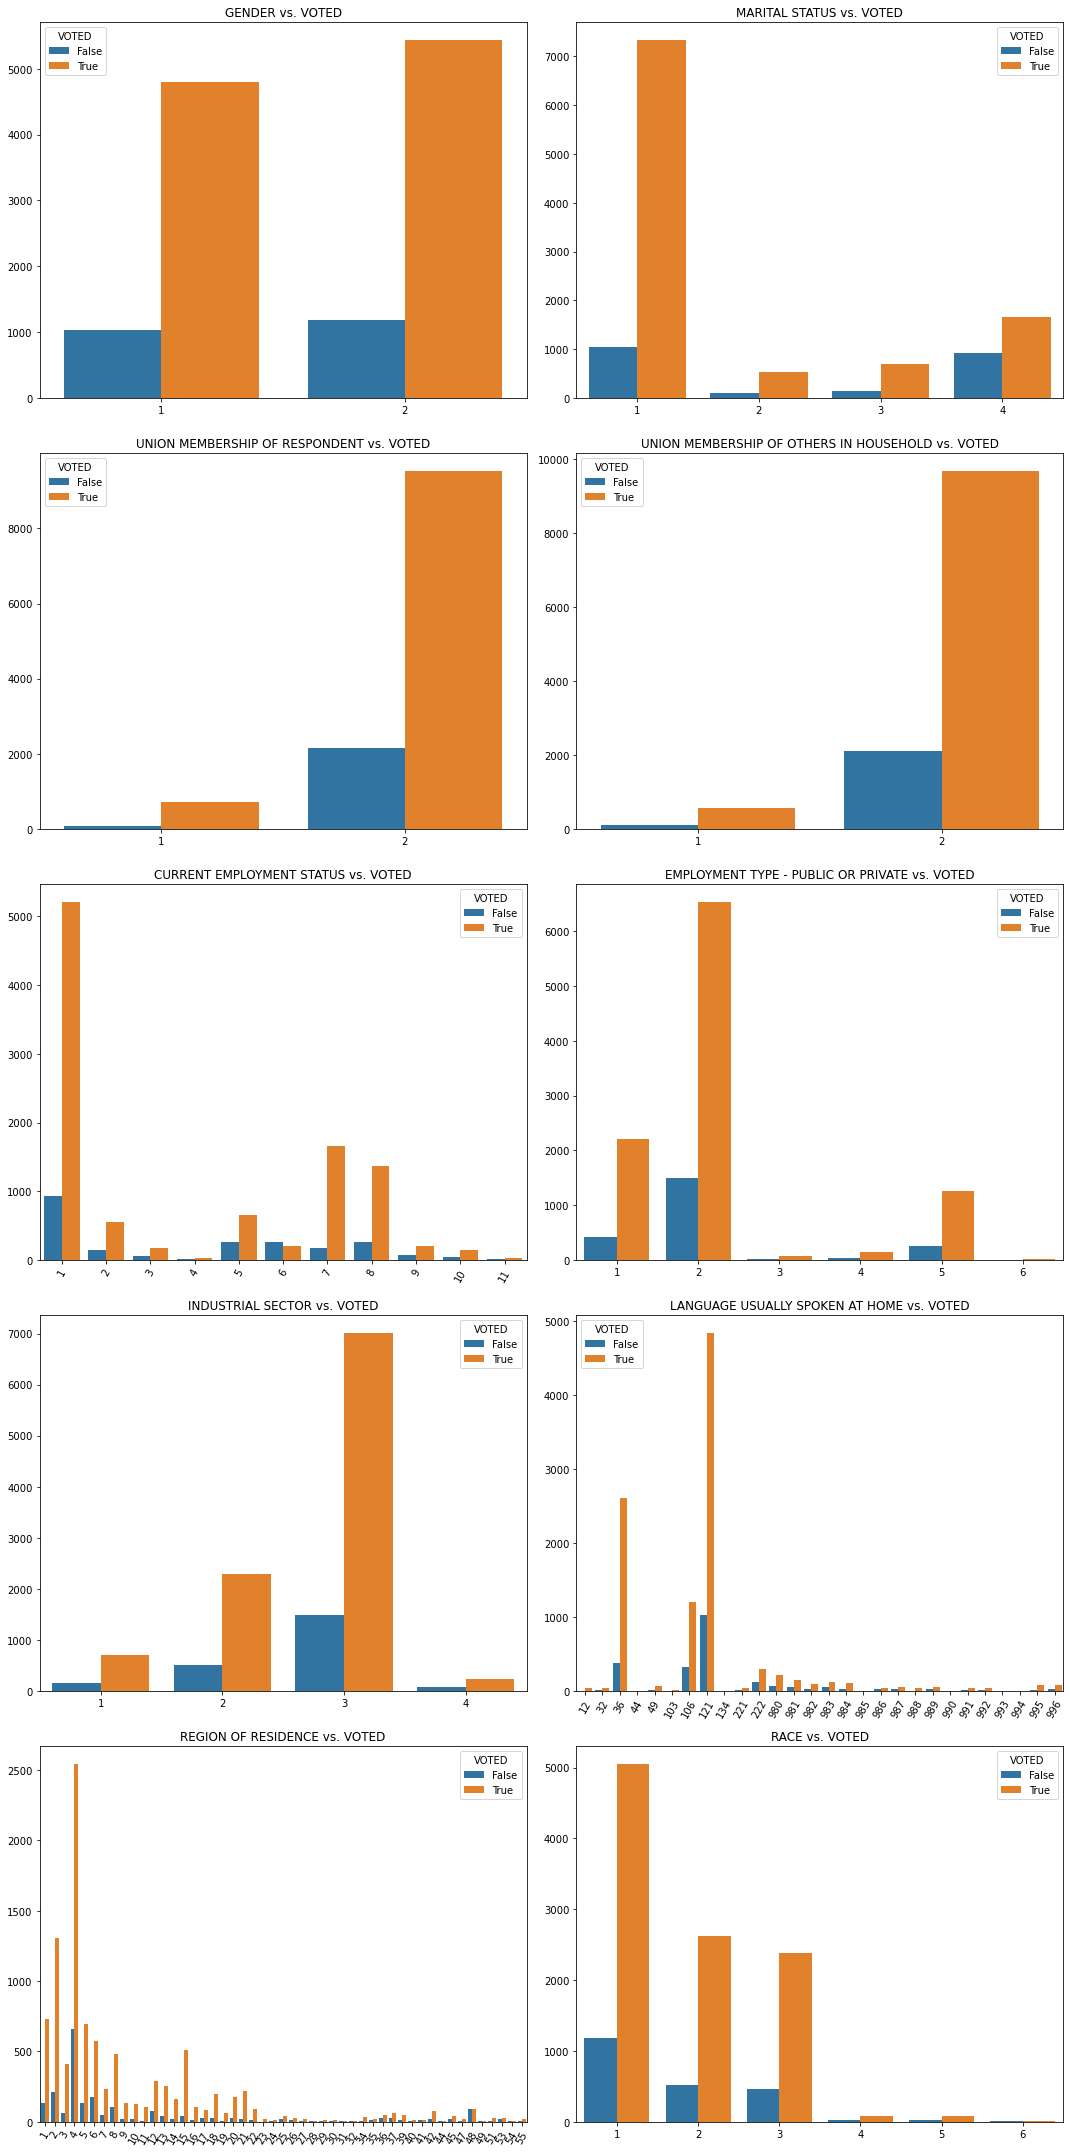

In [15]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(df_categorical.columns):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=col, hue="VOTED", data=pd.concat([df_categorical, df["VOTED"]], axis=1), order = sorted(df_categorical[col].unique()))
    plt.title(f"{col} vs. VOTED")
    if df_categorical[col].nunique() > 10:
        plt.xticks(rotation=60)
    plt.ylabel("")
    plt.xlabel("")
        
plt.tight_layout()
    
plt.show()

### Ordinal Variables

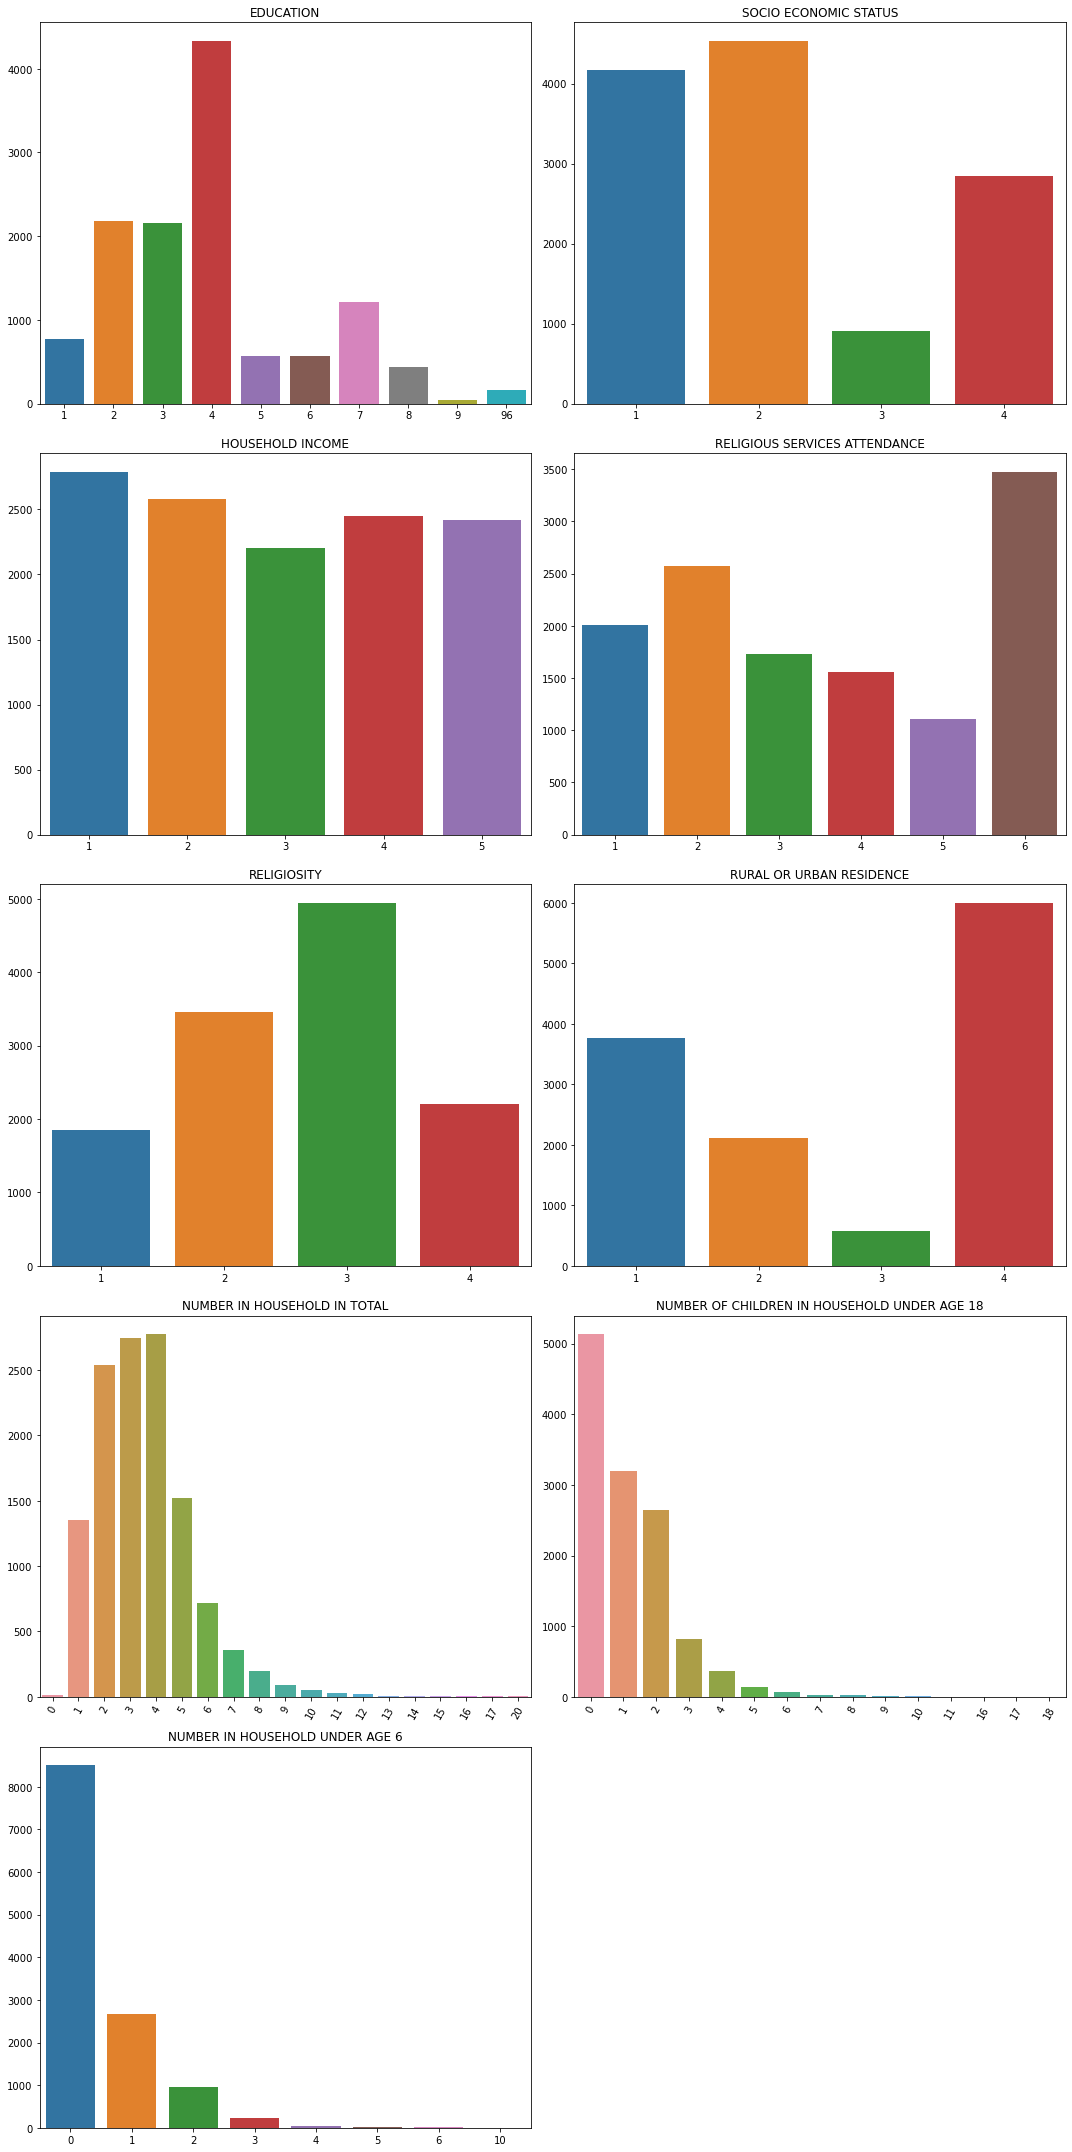

In [16]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(df_ordinal.columns):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df_ordinal[col], order = sorted(df_ordinal[col].unique()))
    plt.title(col)
    if df_ordinal[col].nunique() > 10:
        plt.xticks(rotation=60)
    plt.ylabel("")
    plt.xlabel("")
        
plt.tight_layout()
    
plt.show()

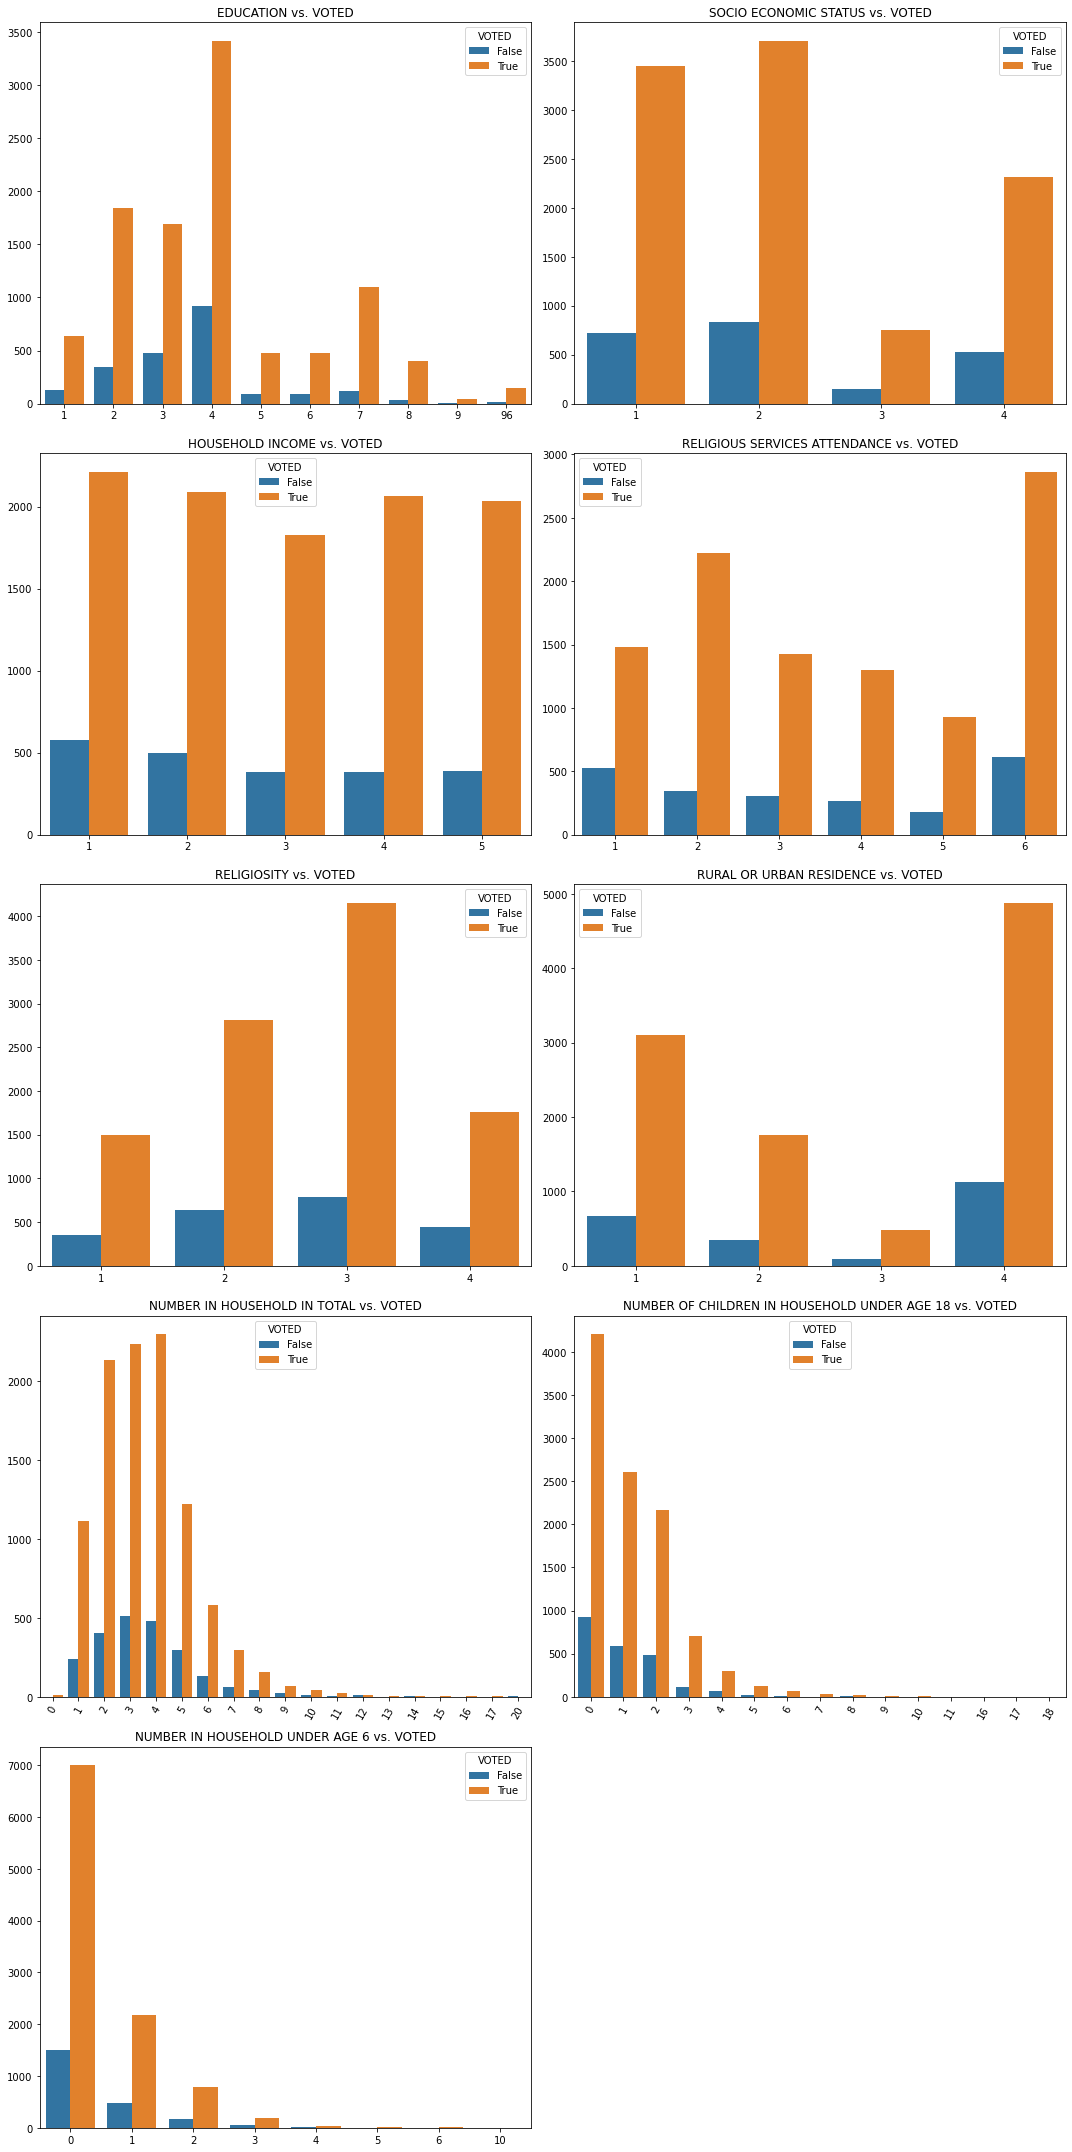

In [17]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(df_ordinal.columns):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=col, hue="VOTED", data=pd.concat([df_ordinal, df["VOTED"]], axis=1), order = sorted(df_ordinal[col].unique()))
    plt.title(f"{col} vs. VOTED")
    if df_ordinal[col].nunique() > 10:
        plt.xticks(rotation=60)
    plt.ylabel("")
    plt.xlabel("")
        
plt.tight_layout()
    
plt.show()

### Numerical Variables

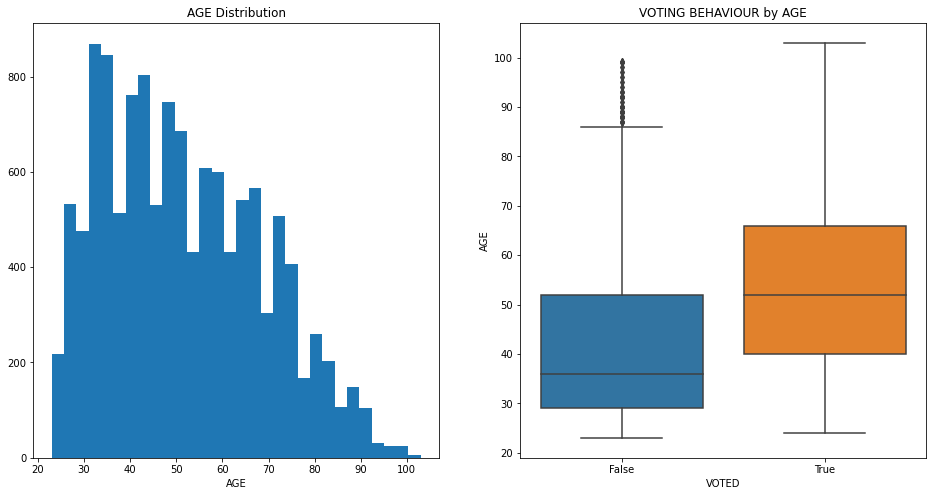

In [18]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.hist(df["AGE"], bins=30)
plt.title("AGE Distribution")
plt.xlabel("AGE")

plt.subplot(1, 2, 2)
sns.boxplot(x="VOTED", y="AGE", data=pd.concat([df_numerical, df["VOTED"]], axis=1))
plt.title("VOTING BEHAVIOUR by AGE")
plt.show()

### Target Variable

In [19]:
print("VOTED" + " "*5 + "Value Counts" + " "*5 + "Percentage")

for val in df["VOTED"].unique():
    print(f"{val}:" + " "*(9-len(str(val))) + f"{df['VOTED'].value_counts()[val]}" + " "*(17-len(str(df['VOTED'].value_counts()[val]))) + f"{df['VOTED'].value_counts()[val]/df.shape[0]:.2f}%")

VOTED     Value Counts     Percentage
True:     10226            0.82%
False:    2225             0.18%


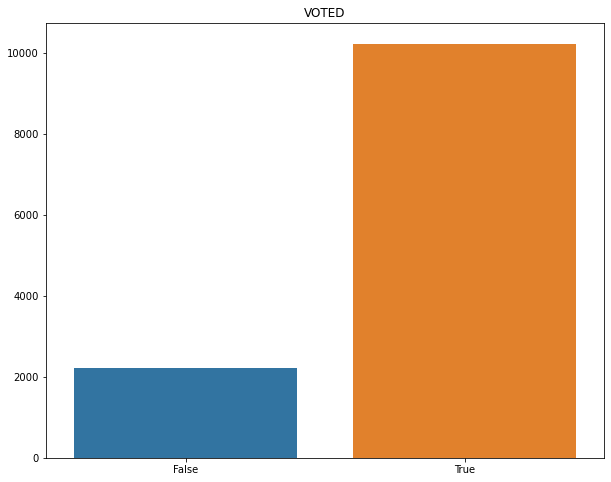

In [20]:
plt.figure(figsize=(10, 8))

sns.countplot(x="VOTED", data=df)
plt.title("VOTED")
plt.xlabel("")
plt.ylabel("")

plt.show()

- Target variable is imbalanced.

### Heatmap

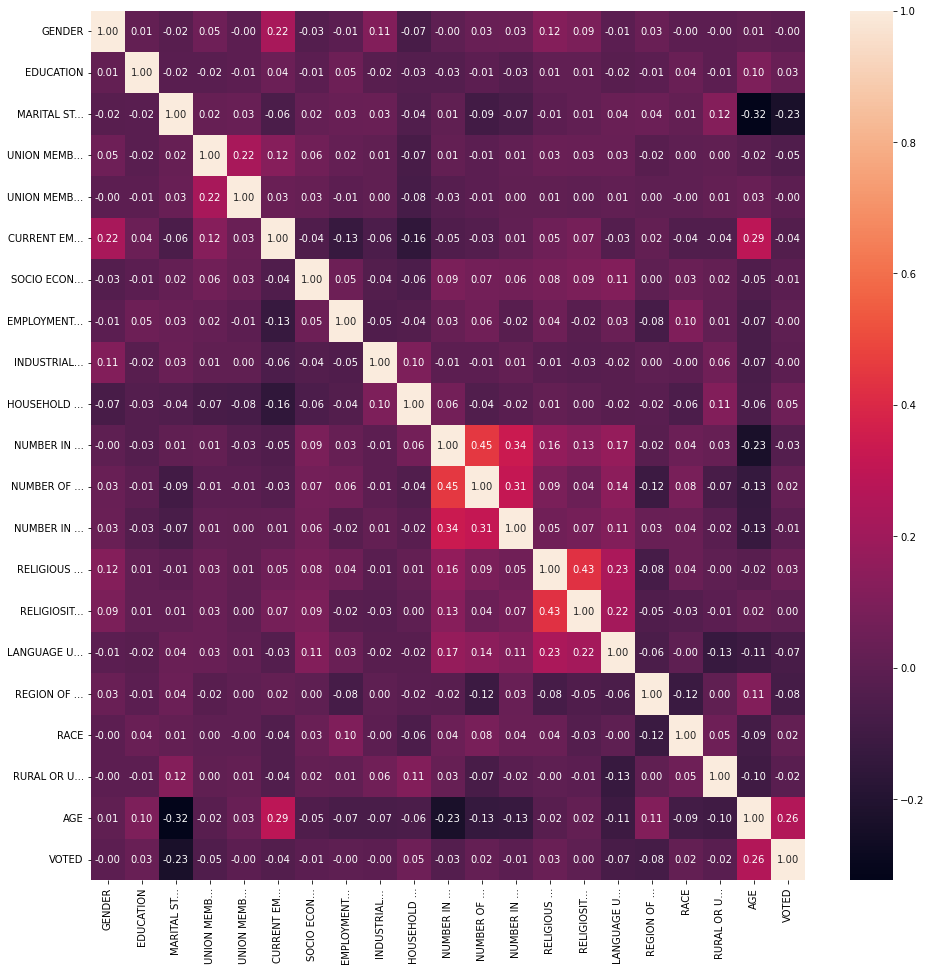

In [21]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, fmt='.2f',
            xticklabels=[val[:10] + "..." if len(val) > 10 else val[:10] for val in df.columns],
            yticklabels=[val[:10] + "..." if len(val) > 10 else val[:10] for val in df.columns])
plt.show()

## One-Hot-Encoding

In [22]:
df_categorical = pd.get_dummies(df_categorical.astype(str), drop_first=True)
df_categorical.head()

,GENDER_2,MARITAL STATUS_2,MARITAL STATUS_3,MARITAL STATUS_4,UNION MEMBERSHIP OF RESPONDENT_2,UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD_2,CURRENT EMPLOYMENT STATUS_10,CURRENT EMPLOYMENT STATUS_11,CURRENT EMPLOYMENT STATUS_2,CURRENT EMPLOYMENT STATUS_3,CURRENT EMPLOYMENT STATUS_4,CURRENT EMPLOYMENT STATUS_5,CURRENT EMPLOYMENT STATUS_6,CURRENT EMPLOYMENT STATUS_7,CURRENT EMPLOYMENT STATUS_8,CURRENT EMPLOYMENT STATUS_9,EMPLOYMENT TYPE - PUBLIC OR PRIVATE_2,EMPLOYMENT TYPE - PUBLIC OR PRIVATE_3,EMPLOYMENT TYPE - PUBLIC OR PRIVATE_4,EMPLOYMENT TYPE - PUBLIC OR PRIVATE_5,EMPLOYMENT TYPE - PUBLIC OR PRIVATE_6,INDUSTRIAL SECTOR_2,INDUSTRIAL SECTOR_3,INDUSTRIAL SECTOR_4,LANGUAGE USUALLY SPOKEN AT HOME_106,...,REGION OF RESIDENCE_37,REGION OF RESIDENCE_39,REGION OF RESIDENCE_4,REGION OF RESIDENCE_40,REGION OF RESIDENCE_41,REGION OF RESIDENCE_42,REGION OF RESIDENCE_44,REGION OF RESIDENCE_45,REGION OF RESIDENCE_47,REGION OF RESIDENCE_48,REGION OF RESIDENCE_49,REGION OF RESIDENCE_5,REGION OF RESIDENCE_51,REGION OF RESIDENCE_53,REGION OF RESIDENCE_54,REGION OF RESIDENCE_55,REGION OF RESIDENCE_6,REGION OF RESIDENCE_7,REGION OF RESIDENCE_8,REGION OF RESIDENCE_9,RACE_2,RACE_3,RACE_4,RACE_5,RACE_6
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- For the ML algorithm, I will use the ones based on decision trees. Therefore, I will not normalize the data since tree-based algorithms do not require normalization.

In [23]:
df = pd.concat([df_categorical, df_ordinal, df_numerical, df["VOTED"]], axis=1)
df.head()

,GENDER_2,MARITAL STATUS_2,MARITAL STATUS_3,MARITAL STATUS_4,UNION MEMBERSHIP OF RESPONDENT_2,UNION MEMBERSHIP OF OTHERS IN HOUSEHOLD_2,CURRENT EMPLOYMENT STATUS_10,CURRENT EMPLOYMENT STATUS_11,CURRENT EMPLOYMENT STATUS_2,CURRENT EMPLOYMENT STATUS_3,CURRENT EMPLOYMENT STATUS_4,CURRENT EMPLOYMENT STATUS_5,CURRENT EMPLOYMENT STATUS_6,CURRENT EMPLOYMENT STATUS_7,CURRENT EMPLOYMENT STATUS_8,CURRENT EMPLOYMENT STATUS_9,EMPLOYMENT TYPE - PUBLIC OR PRIVATE_2,EMPLOYMENT TYPE - PUBLIC OR PRIVATE_3,EMPLOYMENT TYPE - PUBLIC OR PRIVATE_4,EMPLOYMENT TYPE - PUBLIC OR PRIVATE_5,EMPLOYMENT TYPE - PUBLIC OR PRIVATE_6,INDUSTRIAL SECTOR_2,INDUSTRIAL SECTOR_3,INDUSTRIAL SECTOR_4,LANGUAGE USUALLY SPOKEN AT HOME_106,...,REGION OF RESIDENCE_5,REGION OF RESIDENCE_51,REGION OF RESIDENCE_53,REGION OF RESIDENCE_54,REGION OF RESIDENCE_55,REGION OF RESIDENCE_6,REGION OF RESIDENCE_7,REGION OF RESIDENCE_8,REGION OF RESIDENCE_9,RACE_2,RACE_3,RACE_4,RACE_5,RACE_6,EDUCATION,SOCIO ECONOMIC STATUS,HOUSEHOLD INCOME,RELIGIOUS SERVICES ATTENDANCE,RELIGIOSITY,RURAL OR URBAN RESIDENCE,NUMBER IN HOUSEHOLD IN TOTAL,NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18,NUMBER IN HOUSEHOLD UNDER AGE 6,AGE,VOTED
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,1,3,6,3,4,3,0,0,31,True
1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,1,6,3,4,5,3,0,42,True
2,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,2,1,5,2,4,3,0,0,67,True
3,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,3,6,2,4,7,2,2,26,False
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,5,1,3,4,2,0,0,55,True


In [24]:
X = df.drop("VOTED", axis=1)
y = df["VOTED"]

## Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## ML Algorithm

In [26]:
models = [DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier]
models_name = ["DecisionTreeClassifier", "ExtraTreesClassifier", "RandomForestClassifier", "GradientBoostingClassifier"]
scores = [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]

In [27]:
def fit_predict_score(Model, X_train, y_train, X_test, y_test):
    """Fit the model of your choice,
    predict for test data,
    returns accuracy, precision, recall, F1, and ROC AUC scores."""
    
    model = Model(random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_accuracy = model.score(X_train, y_train)
    return [train_accuracy] + [score(y_pred, y_test) for score in scores]

In [28]:
score_results = []

print("Calculating scores for:")
for i, model in enumerate(models):
    print(f"- {models_name[i]}...", end=" ")
    score_results.append(fit_predict_score(model, X_train, y_train, X_test, y_test))
    print("completed.")

Calculating scores for:
- DecisionTreeClassifier... completed.
- ExtraTreesClassifier... completed.
- RandomForestClassifier... completed.
- GradientBoostingClassifier... completed.


In [29]:
initial_results = pd.DataFrame(score_results, index=models_name, columns=["Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1", "ROC AUC"]).T
display(initial_results)

,DecisionTreeClassifier,ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
Train Accuracy,1.000000,1.000000,1.000000,0.867538
Test Accuracy,0.771234,0.845705,0.860793,0.859577
Precision,0.853687,0.979941,0.982301,0.976106
Recall,0.866986,0.854424,0.866736,0.869645
F1,0.860285,0.912888,0.920907,0.919805
ROC AUC,0.611833,0.773366,0.821008,0.801599


- I will continue with **GradientBoostingClassifier**, since other models resulted in overfitting.

## Feature Selection

In [30]:
model = GradientBoostingClassifier(random_state=101)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=101)

In [31]:
feature_importances = pd.concat([pd.Series(X_train.columns), pd.Series(model.feature_importances_)], axis=1).rename({0: "Variable", 1: "Feature_Importance"}, axis=1).sort_values("Feature_Importance", ascending=False).reset_index(drop=True)
display(feature_importances[:30])

,Variable,Feature_Importance
0,AGE,0.626202
1,LANGUAGE USUALLY SPOKEN AT HOME_121,0.048313
2,REGION OF RESIDENCE_48,0.042010
3,EDUCATION,0.036185
4,RELIGIOUS SERVICES ATTENDANCE,0.029347
5,REGION OF RESIDENCE_2,0.018116
6,NUMBER IN HOUSEHOLD IN TOTAL,0.012244
7,HOUSEHOLD INCOME,0.011713
8,MARITAL STATUS_4,0.009261
9,NUMBER OF CHILDREN IN HOUSEHOLD UNDER AGE 18,0.008185


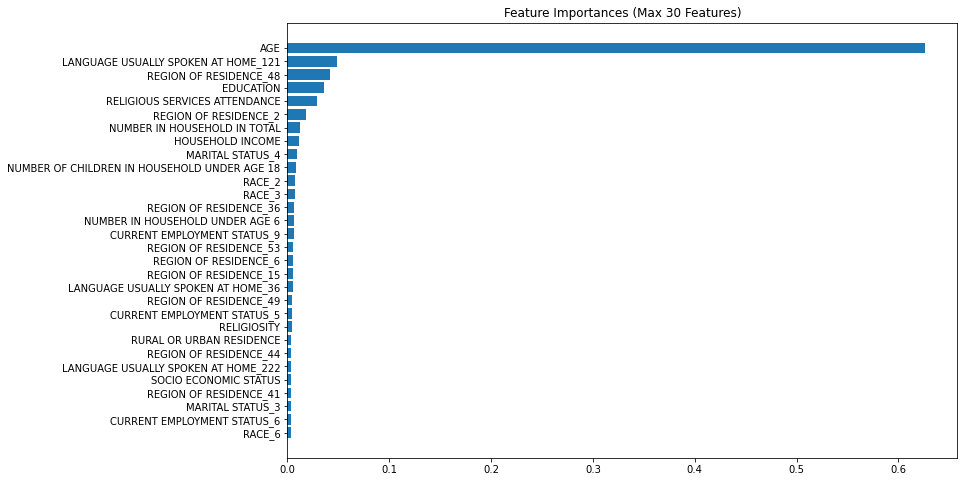

In [32]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importances["Variable"][:30], feature_importances["Feature_Importance"][:30])
plt.gca().invert_yaxis()
plt.title("Feature Importances (Max 30 Features)")
plt.show()

In [33]:
def feature_selection(num_features):
    X_train_new = X_train.drop(list(feature_importances["Variable"][num_features:]), axis=1)
    X_test_new = X_test.drop(list(feature_importances["Variable"][num_features:]), axis=1)
    
    return fit_predict_score(GradientBoostingClassifier, X_train_new, y_train, X_test_new, y_test)

In [34]:
feature_selection_scores = []

print("Calculating scores with:")
for num in range(5, 110, 5):
    print(f"{num} features...", end=" ")
    feature_selection_scores.append(feature_selection(num))
    print("completed.")

Calculating scores with:
5 features... completed.
10 features... completed.
15 features... completed.
20 features... completed.
25 features... completed.
30 features... completed.
35 features... completed.
40 features... completed.
45 features... completed.
50 features... completed.
55 features... completed.
60 features... completed.
65 features... completed.
70 features... completed.
75 features... completed.
80 features... completed.
85 features... completed.
90 features... completed.
95 features... completed.
100 features... completed.
105 features... completed.


In [35]:
feature_selection_results = pd.DataFrame(feature_selection_scores, index=[f"{num}_features" for num in range(5, 110, 5)], columns=["Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1", "ROC AUC"]).T
display(feature_selection_results)

,5_features,10_features,15_features,20_features,25_features,30_features,35_features,40_features,45_features,50_features,55_features,60_features,65_features,70_features,75_features,80_features,85_features,90_features,95_features,100_features,105_features
Train Accuracy,0.859626,0.862982,0.865860,0.868137,0.868137,0.868976,0.868737,0.869576,0.868257,0.869336,0.867778,0.868017,0.868737,0.867778,0.866579,0.867538,0.867538,0.867538,0.867538,0.867538,0.867538
Test Accuracy,0.855439,0.858846,0.857873,0.858116,0.859333,0.858116,0.859820,0.858360,0.859820,0.857630,0.858603,0.858116,0.858116,0.859577,0.859577,0.859820,0.859820,0.859577,0.859577,0.859820,0.859577
Precision,0.976696,0.976696,0.974631,0.974336,0.974926,0.974926,0.975516,0.974926,0.975811,0.975221,0.975811,0.976106,0.975221,0.976106,0.976991,0.976401,0.976401,0.976106,0.976106,0.976401,0.976106
Recall,0.865395,0.868573,0.869016,0.869439,0.870195,0.869051,0.870263,0.869279,0.870068,0.868400,0.868926,0.868276,0.868857,0.869645,0.869063,0.869679,0.869679,0.869645,0.869645,0.869679,0.869645
F1,0.917683,0.919467,0.918799,0.918904,0.919588,0.918949,0.919889,0.919077,0.919911,0.918716,0.919272,0.919039,0.918972,0.919805,0.919872,0.919956,0.919956,0.919805,0.919805,0.919956,0.919805
ROC AUC,0.793121,0.801290,0.794443,0.794397,0.798441,0.795636,0.800827,0.796203,0.801484,0.795127,0.798701,0.798232,0.796270,0.801599,0.803659,0.802827,0.802827,0.801599,0.801599,0.802827,0.801599


In [36]:
print("Number of features with the maximum scores:\n")
print(feature_selection_results.idxmax(axis=1))

Number of features with the maximum scores:

Train Accuracy    40_features
Test Accuracy     35_features
Precision         75_features
Recall            35_features
F1                80_features
ROC AUC           75_features
dtype: object


- I will continue with the first **45 features** with the highest importance.

In [37]:
X_train = X_train.drop(list(feature_importances["Variable"][45:]), axis=1)
X_test = X_test.drop(list(feature_importances["Variable"][45:]), axis=1)

## Hyperparameter Tuning

In [38]:
params = {
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_depth': [1,3,5,7,9],
    'min_samples_split': [0.1, 0.3, 0.5, 0.7, 0.9],
    'min_samples_leaf': [0.1, 0.3, 0.5, 1],
}

gbc_grid = GridSearchCV(estimator = GradientBoostingClassifier(random_state=101),
                        param_grid = params,
                        cv = 3,
                        verbose = 3)

gbc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[CV 1/3] END learning_rate=0.1, max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.851 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.841 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.845 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=1, min_samples_leaf=0.1, min_samples_split=0.3;, score=0.851 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=1, min_samples_leaf=0.1, min_samples_split=0.3;, score=0.841 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=1, min_samples_leaf=0.1, min_samples_split=0.3;, score=0.845 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=1, min_samples_leaf=0.1, min_samples_split=0.5;, score=0.851 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=1, min_samples_leaf=0.1, min_samples_spl

[CV 2/3] END learning_rate=0.1, max_depth=3, min_samples_leaf=0.1, min_samples_split=0.5;, score=0.842 total time=   0.4s
[CV 3/3] END learning_rate=0.1, max_depth=3, min_samples_leaf=0.1, min_samples_split=0.5;, score=0.847 total time=   0.4s
[CV 1/3] END learning_rate=0.1, max_depth=3, min_samples_leaf=0.1, min_samples_split=0.7;, score=0.851 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=3, min_samples_leaf=0.1, min_samples_split=0.7;, score=0.839 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=3, min_samples_leaf=0.1, min_samples_split=0.7;, score=0.846 total time=   0.3s
[CV 1/3] END learning_rate=0.1, max_depth=3, min_samples_leaf=0.1, min_samples_split=0.9;, score=0.851 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=3, min_samples_leaf=0.1, min_samples_split=0.9;, score=0.841 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=3, min_samples_leaf=0.1, min_samples_split=0.9;, score=0.845 total time=   0.1s
[CV 1/3] END learning_ra

[CV 1/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=0.3, min_samples_split=0.1;, score=0.819 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=0.3, min_samples_split=0.1;, score=0.819 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=0.3, min_samples_split=0.1;, score=0.819 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=0.3, min_samples_split=0.3;, score=0.819 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=0.3, min_samples_split=0.3;, score=0.819 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=0.3, min_samples_split=0.3;, score=0.819 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=0.3, min_samples_split=0.5;, score=0.819 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=0.3, min_samples_split=0.5;, score=0.819 total time=   0.2s
[CV 3/3] END learning_ra

[CV 3/3] END learning_rate=0.1, max_depth=7, min_samples_leaf=0.3, min_samples_split=0.5;, score=0.819 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=7, min_samples_leaf=0.3, min_samples_split=0.7;, score=0.819 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=7, min_samples_leaf=0.3, min_samples_split=0.7;, score=0.819 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=7, min_samples_leaf=0.3, min_samples_split=0.7;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=7, min_samples_leaf=0.3, min_samples_split=0.9;, score=0.819 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=7, min_samples_leaf=0.3, min_samples_split=0.9;, score=0.819 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=7, min_samples_leaf=0.3, min_samples_split=0.9;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=7, min_samples_leaf=0.5, min_samples_split=0.1;, score=0.819 total time=   0.0s
[CV 2/3] END learning_ra

[CV 3/3] END learning_rate=0.1, max_depth=9, min_samples_leaf=0.5, min_samples_split=0.1;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=9, min_samples_leaf=0.5, min_samples_split=0.3;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=9, min_samples_leaf=0.5, min_samples_split=0.3;, score=0.819 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=9, min_samples_leaf=0.5, min_samples_split=0.3;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=9, min_samples_leaf=0.5, min_samples_split=0.5;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=9, min_samples_leaf=0.5, min_samples_split=0.5;, score=0.819 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=9, min_samples_leaf=0.5, min_samples_split=0.5;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=9, min_samples_leaf=0.5, min_samples_split=0.7;, score=0.819 total time=   0.0s
[CV 2/3] END learning_ra

[CV 3/3] END learning_rate=0.3, max_depth=1, min_samples_leaf=0.5, min_samples_split=0.7;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.3, max_depth=1, min_samples_leaf=0.5, min_samples_split=0.9;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.3, max_depth=1, min_samples_leaf=0.5, min_samples_split=0.9;, score=0.819 total time=   0.0s
[CV 3/3] END learning_rate=0.3, max_depth=1, min_samples_leaf=0.5, min_samples_split=0.9;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=0.1;, score=0.865 total time=   0.1s
[CV 2/3] END learning_rate=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=0.1;, score=0.859 total time=   0.1s
[CV 3/3] END learning_rate=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=0.1;, score=0.846 total time=   0.1s
[CV 1/3] END learning_rate=0.3, max_depth=1, min_samples_leaf=1, min_samples_split=0.3;, score=0.865 total time=   0.1s
[CV 2/3] END learning_rate=0.3, 

[CV 2/3] END learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=0.3;, score=0.858 total time=   0.4s
[CV 3/3] END learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=0.3;, score=0.849 total time=   0.4s
[CV 1/3] END learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=0.863 total time=   0.4s
[CV 2/3] END learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=0.858 total time=   0.4s
[CV 3/3] END learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=0.5;, score=0.851 total time=   0.4s
[CV 1/3] END learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=0.7;, score=0.866 total time=   0.4s
[CV 2/3] END learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=0.7;, score=0.857 total time=   0.4s
[CV 3/3] END learning_rate=0.3, max_depth=3, min_samples_leaf=1, min_samples_split=0.7;, score=0.849 total time=   0.4s
[CV 1/3] END learning_rate=0.3, max_dept

[CV 1/3] END learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=0.9;, score=0.864 total time=   0.4s
[CV 2/3] END learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=0.9;, score=0.858 total time=   0.3s
[CV 3/3] END learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=0.9;, score=0.850 total time=   0.4s
[CV 1/3] END learning_rate=0.3, max_depth=7, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.842 total time=   0.6s
[CV 2/3] END learning_rate=0.3, max_depth=7, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.839 total time=   0.6s
[CV 3/3] END learning_rate=0.3, max_depth=7, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.845 total time=   0.6s
[CV 1/3] END learning_rate=0.3, max_depth=7, min_samples_leaf=0.1, min_samples_split=0.3;, score=0.848 total time=   0.5s
[CV 2/3] END learning_rate=0.3, max_depth=7, min_samples_leaf=0.1, min_samples_split=0.3;, score=0.840 total time=   0.5s
[CV 3/3] END learning_rate=0.3

[CV 3/3] END learning_rate=0.3, max_depth=9, min_samples_leaf=0.1, min_samples_split=0.3;, score=0.842 total time=   0.5s
[CV 1/3] END learning_rate=0.3, max_depth=9, min_samples_leaf=0.1, min_samples_split=0.5;, score=0.848 total time=   0.3s
[CV 2/3] END learning_rate=0.3, max_depth=9, min_samples_leaf=0.1, min_samples_split=0.5;, score=0.840 total time=   0.4s
[CV 3/3] END learning_rate=0.3, max_depth=9, min_samples_leaf=0.1, min_samples_split=0.5;, score=0.845 total time=   0.4s
[CV 1/3] END learning_rate=0.3, max_depth=9, min_samples_leaf=0.1, min_samples_split=0.7;, score=0.850 total time=   0.3s
[CV 2/3] END learning_rate=0.3, max_depth=9, min_samples_leaf=0.1, min_samples_split=0.7;, score=0.841 total time=   0.2s
[CV 3/3] END learning_rate=0.3, max_depth=9, min_samples_leaf=0.1, min_samples_split=0.7;, score=0.845 total time=   0.2s
[CV 1/3] END learning_rate=0.3, max_depth=9, min_samples_leaf=0.1, min_samples_split=0.9;, score=0.849 total time=   0.1s
[CV 2/3] END learning_ra

[CV 2/3] END learning_rate=0.5, max_depth=1, min_samples_leaf=0.1, min_samples_split=0.9;, score=0.840 total time=   0.1s
[CV 3/3] END learning_rate=0.5, max_depth=1, min_samples_leaf=0.1, min_samples_split=0.9;, score=0.846 total time=   0.1s
[CV 1/3] END learning_rate=0.5, max_depth=1, min_samples_leaf=0.3, min_samples_split=0.1;, score=0.820 total time=   0.1s
[CV 2/3] END learning_rate=0.5, max_depth=1, min_samples_leaf=0.3, min_samples_split=0.1;, score=0.820 total time=   0.2s
[CV 3/3] END learning_rate=0.5, max_depth=1, min_samples_leaf=0.3, min_samples_split=0.1;, score=0.819 total time=   0.2s
[CV 1/3] END learning_rate=0.5, max_depth=1, min_samples_leaf=0.3, min_samples_split=0.3;, score=0.820 total time=   0.2s
[CV 2/3] END learning_rate=0.5, max_depth=1, min_samples_leaf=0.3, min_samples_split=0.3;, score=0.820 total time=   0.1s
[CV 3/3] END learning_rate=0.5, max_depth=1, min_samples_leaf=0.3, min_samples_split=0.3;, score=0.819 total time=   0.2s
[CV 1/3] END learning_ra

[CV 1/3] END learning_rate=0.5, max_depth=3, min_samples_leaf=0.3, min_samples_split=0.5;, score=0.818 total time=   0.2s
[CV 2/3] END learning_rate=0.5, max_depth=3, min_samples_leaf=0.3, min_samples_split=0.5;, score=0.819 total time=   0.2s
[CV 3/3] END learning_rate=0.5, max_depth=3, min_samples_leaf=0.3, min_samples_split=0.5;, score=0.817 total time=   0.2s
[CV 1/3] END learning_rate=0.5, max_depth=3, min_samples_leaf=0.3, min_samples_split=0.7;, score=0.820 total time=   0.1s
[CV 2/3] END learning_rate=0.5, max_depth=3, min_samples_leaf=0.3, min_samples_split=0.7;, score=0.820 total time=   0.1s
[CV 3/3] END learning_rate=0.5, max_depth=3, min_samples_leaf=0.3, min_samples_split=0.7;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.5, max_depth=3, min_samples_leaf=0.3, min_samples_split=0.9;, score=0.820 total time=   0.1s
[CV 2/3] END learning_rate=0.5, max_depth=3, min_samples_leaf=0.3, min_samples_split=0.9;, score=0.820 total time=   0.1s
[CV 3/3] END learning_ra

[CV 3/3] END learning_rate=0.5, max_depth=5, min_samples_leaf=0.3, min_samples_split=0.9;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.5, max_depth=5, min_samples_leaf=0.5, min_samples_split=0.1;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=5, min_samples_leaf=0.5, min_samples_split=0.1;, score=0.819 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=5, min_samples_leaf=0.5, min_samples_split=0.1;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.5, max_depth=5, min_samples_leaf=0.5, min_samples_split=0.3;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=5, min_samples_leaf=0.5, min_samples_split=0.3;, score=0.819 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=5, min_samples_leaf=0.5, min_samples_split=0.3;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.5, max_depth=5, min_samples_leaf=0.5, min_samples_split=0.5;, score=0.819 total time=   0.0s
[CV 2/3] END learning_ra

[CV 3/3] END learning_rate=0.5, max_depth=7, min_samples_leaf=0.5, min_samples_split=0.5;, score=0.819 total time=   0.2s
[CV 1/3] END learning_rate=0.5, max_depth=7, min_samples_leaf=0.5, min_samples_split=0.7;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=7, min_samples_leaf=0.5, min_samples_split=0.7;, score=0.819 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=7, min_samples_leaf=0.5, min_samples_split=0.7;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.5, max_depth=7, min_samples_leaf=0.5, min_samples_split=0.9;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.5, max_depth=7, min_samples_leaf=0.5, min_samples_split=0.9;, score=0.819 total time=   0.0s
[CV 3/3] END learning_rate=0.5, max_depth=7, min_samples_leaf=0.5, min_samples_split=0.9;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.5, max_depth=7, min_samples_leaf=1, min_samples_split=0.1;, score=0.846 total time=   1.0s
[CV 2/3] END learning_rate

[CV 2/3] END learning_rate=0.5, max_depth=9, min_samples_leaf=1, min_samples_split=0.1;, score=0.834 total time=   1.2s
[CV 3/3] END learning_rate=0.5, max_depth=9, min_samples_leaf=1, min_samples_split=0.1;, score=0.841 total time=   1.2s
[CV 1/3] END learning_rate=0.5, max_depth=9, min_samples_leaf=1, min_samples_split=0.3;, score=0.852 total time=   0.9s
[CV 2/3] END learning_rate=0.5, max_depth=9, min_samples_leaf=1, min_samples_split=0.3;, score=0.849 total time=   0.9s
[CV 3/3] END learning_rate=0.5, max_depth=9, min_samples_leaf=1, min_samples_split=0.3;, score=0.849 total time=   0.9s
[CV 1/3] END learning_rate=0.5, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=0.858 total time=   0.7s
[CV 2/3] END learning_rate=0.5, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=0.852 total time=   0.7s
[CV 3/3] END learning_rate=0.5, max_depth=9, min_samples_leaf=1, min_samples_split=0.5;, score=0.852 total time=   0.7s
[CV 1/3] END learning_rate=0.5, max_dept

[CV 1/3] END learning_rate=0.7, max_depth=1, min_samples_leaf=1, min_samples_split=0.7;, score=0.866 total time=   0.1s
[CV 2/3] END learning_rate=0.7, max_depth=1, min_samples_leaf=1, min_samples_split=0.7;, score=0.860 total time=   0.1s
[CV 3/3] END learning_rate=0.7, max_depth=1, min_samples_leaf=1, min_samples_split=0.7;, score=0.847 total time=   0.1s
[CV 1/3] END learning_rate=0.7, max_depth=1, min_samples_leaf=1, min_samples_split=0.9;, score=0.866 total time=   0.1s
[CV 2/3] END learning_rate=0.7, max_depth=1, min_samples_leaf=1, min_samples_split=0.9;, score=0.860 total time=   0.1s
[CV 3/3] END learning_rate=0.7, max_depth=1, min_samples_leaf=1, min_samples_split=0.9;, score=0.847 total time=   0.1s
[CV 1/3] END learning_rate=0.7, max_depth=3, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.840 total time=   0.4s
[CV 2/3] END learning_rate=0.7, max_depth=3, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.836 total time=   0.4s
[CV 3/3] END learning_rate=0.7, max_

[CV 3/3] END learning_rate=0.7, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.1;, score=0.842 total time=   0.5s
[CV 1/3] END learning_rate=0.7, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.3;, score=0.842 total time=   0.4s
[CV 2/3] END learning_rate=0.7, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.3;, score=0.836 total time=   0.4s
[CV 3/3] END learning_rate=0.7, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.3;, score=0.841 total time=   0.4s
[CV 1/3] END learning_rate=0.7, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.5;, score=0.848 total time=   0.3s
[CV 2/3] END learning_rate=0.7, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.5;, score=0.837 total time=   0.3s
[CV 3/3] END learning_rate=0.7, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.5;, score=0.846 total time=   0.3s
[CV 1/3] END learning_rate=0.7, max_depth=5, min_samples_leaf=0.1, min_samples_split=0.7;, score=0.850 total time=   0.2s
[CV 2/3] END learning_ra

[CV 2/3] END learning_rate=0.7, max_depth=7, min_samples_leaf=0.1, min_samples_split=0.7;, score=0.841 total time=   0.2s
[CV 3/3] END learning_rate=0.7, max_depth=7, min_samples_leaf=0.1, min_samples_split=0.7;, score=0.845 total time=   0.2s
[CV 1/3] END learning_rate=0.7, max_depth=7, min_samples_leaf=0.1, min_samples_split=0.9;, score=0.848 total time=   0.1s
[CV 2/3] END learning_rate=0.7, max_depth=7, min_samples_leaf=0.1, min_samples_split=0.9;, score=0.837 total time=   0.1s
[CV 3/3] END learning_rate=0.7, max_depth=7, min_samples_leaf=0.1, min_samples_split=0.9;, score=0.845 total time=   0.1s
[CV 1/3] END learning_rate=0.7, max_depth=7, min_samples_leaf=0.3, min_samples_split=0.1;, score=0.818 total time=   0.2s
[CV 2/3] END learning_rate=0.7, max_depth=7, min_samples_leaf=0.3, min_samples_split=0.1;, score=0.819 total time=   0.2s
[CV 3/3] END learning_rate=0.7, max_depth=7, min_samples_leaf=0.3, min_samples_split=0.1;, score=0.816 total time=   0.2s
[CV 1/3] END learning_ra

[CV 1/3] END learning_rate=0.7, max_depth=9, min_samples_leaf=0.3, min_samples_split=0.3;, score=0.818 total time=   0.2s
[CV 2/3] END learning_rate=0.7, max_depth=9, min_samples_leaf=0.3, min_samples_split=0.3;, score=0.819 total time=   0.2s
[CV 3/3] END learning_rate=0.7, max_depth=9, min_samples_leaf=0.3, min_samples_split=0.3;, score=0.816 total time=   0.2s
[CV 1/3] END learning_rate=0.7, max_depth=9, min_samples_leaf=0.3, min_samples_split=0.5;, score=0.818 total time=   0.2s
[CV 2/3] END learning_rate=0.7, max_depth=9, min_samples_leaf=0.3, min_samples_split=0.5;, score=0.819 total time=   0.2s
[CV 3/3] END learning_rate=0.7, max_depth=9, min_samples_leaf=0.3, min_samples_split=0.5;, score=0.816 total time=   0.2s
[CV 1/3] END learning_rate=0.7, max_depth=9, min_samples_leaf=0.3, min_samples_split=0.7;, score=0.819 total time=   0.1s
[CV 2/3] END learning_rate=0.7, max_depth=9, min_samples_leaf=0.3, min_samples_split=0.7;, score=0.819 total time=   0.1s
[CV 3/3] END learning_ra

[CV 3/3] END learning_rate=0.9, max_depth=1, min_samples_leaf=0.3, min_samples_split=0.7;, score=0.817 total time=   0.1s
[CV 1/3] END learning_rate=0.9, max_depth=1, min_samples_leaf=0.3, min_samples_split=0.9;, score=0.819 total time=   0.1s
[CV 2/3] END learning_rate=0.9, max_depth=1, min_samples_leaf=0.3, min_samples_split=0.9;, score=0.819 total time=   0.1s
[CV 3/3] END learning_rate=0.9, max_depth=1, min_samples_leaf=0.3, min_samples_split=0.9;, score=0.817 total time=   0.1s
[CV 1/3] END learning_rate=0.9, max_depth=1, min_samples_leaf=0.5, min_samples_split=0.1;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.9, max_depth=1, min_samples_leaf=0.5, min_samples_split=0.1;, score=0.819 total time=   0.0s
[CV 3/3] END learning_rate=0.9, max_depth=1, min_samples_leaf=0.5, min_samples_split=0.1;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.9, max_depth=1, min_samples_leaf=0.5, min_samples_split=0.3;, score=0.819 total time=   0.0s
[CV 2/3] END learning_ra

[CV 3/3] END learning_rate=0.9, max_depth=3, min_samples_leaf=0.5, min_samples_split=0.3;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.9, max_depth=3, min_samples_leaf=0.5, min_samples_split=0.5;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.9, max_depth=3, min_samples_leaf=0.5, min_samples_split=0.5;, score=0.819 total time=   0.0s
[CV 3/3] END learning_rate=0.9, max_depth=3, min_samples_leaf=0.5, min_samples_split=0.5;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.9, max_depth=3, min_samples_leaf=0.5, min_samples_split=0.7;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.9, max_depth=3, min_samples_leaf=0.5, min_samples_split=0.7;, score=0.819 total time=   0.0s
[CV 3/3] END learning_rate=0.9, max_depth=3, min_samples_leaf=0.5, min_samples_split=0.7;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.9, max_depth=3, min_samples_leaf=0.5, min_samples_split=0.9;, score=0.819 total time=   0.0s
[CV 2/3] END learning_ra

[CV 3/3] END learning_rate=0.9, max_depth=5, min_samples_leaf=0.5, min_samples_split=0.9;, score=0.819 total time=   0.1s
[CV 1/3] END learning_rate=0.9, max_depth=5, min_samples_leaf=1, min_samples_split=0.1;, score=0.838 total time=   0.7s
[CV 2/3] END learning_rate=0.9, max_depth=5, min_samples_leaf=1, min_samples_split=0.1;, score=0.832 total time=   0.8s
[CV 3/3] END learning_rate=0.9, max_depth=5, min_samples_leaf=1, min_samples_split=0.1;, score=0.837 total time=   0.8s
[CV 1/3] END learning_rate=0.9, max_depth=5, min_samples_leaf=1, min_samples_split=0.3;, score=0.851 total time=   0.7s
[CV 2/3] END learning_rate=0.9, max_depth=5, min_samples_leaf=1, min_samples_split=0.3;, score=0.848 total time=   0.6s
[CV 3/3] END learning_rate=0.9, max_depth=5, min_samples_leaf=1, min_samples_split=0.3;, score=0.846 total time=   0.6s
[CV 1/3] END learning_rate=0.9, max_depth=5, min_samples_leaf=1, min_samples_split=0.5;, score=0.857 total time=   0.6s
[CV 2/3] END learning_rate=0.9, max_de

[CV 2/3] END learning_rate=0.9, max_depth=7, min_samples_leaf=1, min_samples_split=0.5;, score=0.849 total time=   0.7s
[CV 3/3] END learning_rate=0.9, max_depth=7, min_samples_leaf=1, min_samples_split=0.5;, score=0.845 total time=   0.7s
[CV 1/3] END learning_rate=0.9, max_depth=7, min_samples_leaf=1, min_samples_split=0.7;, score=0.851 total time=   0.5s
[CV 2/3] END learning_rate=0.9, max_depth=7, min_samples_leaf=1, min_samples_split=0.7;, score=0.859 total time=   0.5s
[CV 3/3] END learning_rate=0.9, max_depth=7, min_samples_leaf=1, min_samples_split=0.7;, score=0.847 total time=   0.5s
[CV 1/3] END learning_rate=0.9, max_depth=7, min_samples_leaf=1, min_samples_split=0.9;, score=0.860 total time=   0.3s
[CV 2/3] END learning_rate=0.9, max_depth=7, min_samples_leaf=1, min_samples_split=0.9;, score=0.855 total time=   0.2s
[CV 3/3] END learning_rate=0.9, max_depth=7, min_samples_leaf=1, min_samples_split=0.9;, score=0.849 total time=   0.3s
[CV 1/3] END learning_rate=0.9, max_dept

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'max_depth': [1, 3, 5, 7, 9],
                         'min_samples_leaf': [0.1, 0.3, 0.5, 1],
                         'min_samples_split': [0.1, 0.3, 0.5, 0.7, 0.9]},
             verbose=3)

In [39]:
gbc_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1}

In [40]:
model = GradientBoostingClassifier(random_state=101, learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
gbc_tuned_results = pd.Series([model.score(X_train, y_train), accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                               recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)],
                              index=initial_results.index, name="GBC_tuned")
initial_gbc = pd.Series(initial_results["GradientBoostingClassifier"], name="Initial_GBC")
gbc_45_features = pd.Series(feature_selection_results["75_features"], name= "GBC_45_features")

In [42]:
results_comparison = pd.concat([gbc_45_features, initial_gbc, gbc_tuned_results], axis=1)
display(results_comparison)

,GBC_45_features,Initial_GBC,GBC_tuned
Train Accuracy,0.866579,0.867538,0.865020
Test Accuracy,0.859577,0.859577,0.859577
Precision,0.976991,0.976106,0.869451
Recall,0.869063,0.869645,0.976401
F1,0.919872,0.919805,0.919828
ROC AUC,0.803659,0.801599,0.642582
